In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten and  normalize pixel in to [0-1]
X_train = X_train.reshape(len(X_train), 28 * 28) / 255.0
X_test = X_test.reshape(len(X_test), 28 * 28) / 255.0

In [8]:
# Number of pixels per image
num_features = 784 
num_classes = 10  # Digits 0-9
learning_rate = 0.00019
theta = 550 # Threshold for activation

# One-hot encode the labels
y_train_encoded = np.eye(num_classes)[y_train]
y_test_encoded = np.eye(num_classes)[y_test]

# Initialize weights and bias with 0
weights = np.zeros((num_features, num_classes))
bias = np.zeros(num_classes)


In [4]:
# this is activation function of perceptron learning
def activation_function(y_in, theta):
    result = np.zeros_like(y_in)
    result[y_in > theta] = 1
    result[(y_in <= theta) & (y_in >= -theta)] = 0
    result[y_in < -theta] = -1
    return result

In [5]:
# More epochs give the model additional time to fine-tune the weights.
# epochs = 200
epochs = 15
# Training function
def train_model(X_train, y_train_encoded, weights, bias, learning_rate, epochs, theta):
    for epoch in range(epochs):
        for i in range(len(X_train)):
            # This is the Net
            y_in = np.dot(X_train[i], weights) + bias
            # this is the output
            y_pred = activation_function(y_in, theta)

            # Update weights and bias for each class
            for j in range(num_classes):
            # y_train_encoded[i][j] this is the target
                if y_pred[j] != y_train_encoded[i][j]:
                    weights[:, j] += learning_rate * y_train_encoded[i][j] * X_train[i]
                    bias[j] += learning_rate * y_train_encoded[i][j]

        print(f"Epoch {epoch + 1}/{epochs} completed")
    return weights, bias

In [10]:
def test_model(X_test, y_test_encoded, weights, bias, theta):
  
    y_test_pred_scores = np.dot(X_test, weights) + bias
    y_test_pred = np.argmax(y_test_pred_scores, axis=1)
    y_test_actual = np.argmax(y_test_encoded, axis=1)
    correct_predictions = np.sum(y_test_actual == y_test_pred)
    total_predictions = len(y_test_actual)
    test_accuracy = correct_predictions / total_predictions
    return test_accuracy, y_test_pred, y_test_actual


In [11]:
# Train the model
weights, bias = train_model(X_train, y_train_encoded, weights, bias, learning_rate, epochs, theta)

Epoch 1/15 completed
Epoch 2/15 completed
Epoch 3/15 completed
Epoch 4/15 completed
Epoch 5/15 completed
Epoch 6/15 completed
Epoch 7/15 completed
Epoch 8/15 completed
Epoch 9/15 completed
Epoch 10/15 completed
Epoch 11/15 completed
Epoch 12/15 completed
Epoch 13/15 completed
Epoch 14/15 completed
Epoch 15/15 completed


In [12]:
# Test the model
test_accuracy, y_test_pred, y_test_actual = test_model(X_test, y_test_encoded, weights, bias, theta)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 79.38%


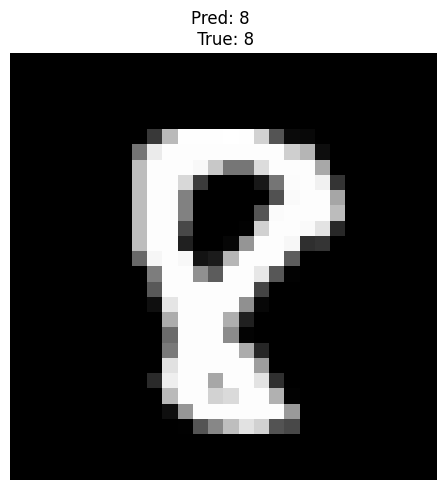

In [13]:
 # Plot some test images with true and predicted labels....i got this plotting implementation form chatGPT
num_images = 1  # Number of images to display
indices = np.random.choice(len(X_test), num_images, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    image = X_test[idx].reshape(28, 28)  # Reshape to 28x28 image
    true_label = y_test_actual[idx]  # Get true label
    predicted_label = y_test_pred[idx]  # Get predicted label

    plt.subplot(1, num_images, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {predicted_label} \n True: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
